In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe() #There's anomalies in the data like 0 values in places they shouldn't be

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
len(df[(df['BMI'] == 0) | (df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['SkinThickness'] == 0) | (df['Insulin'] == 0)])

376

In [7]:
df['Outcome'].value_counts() #Checking for class imbalance, It's not too bad 

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


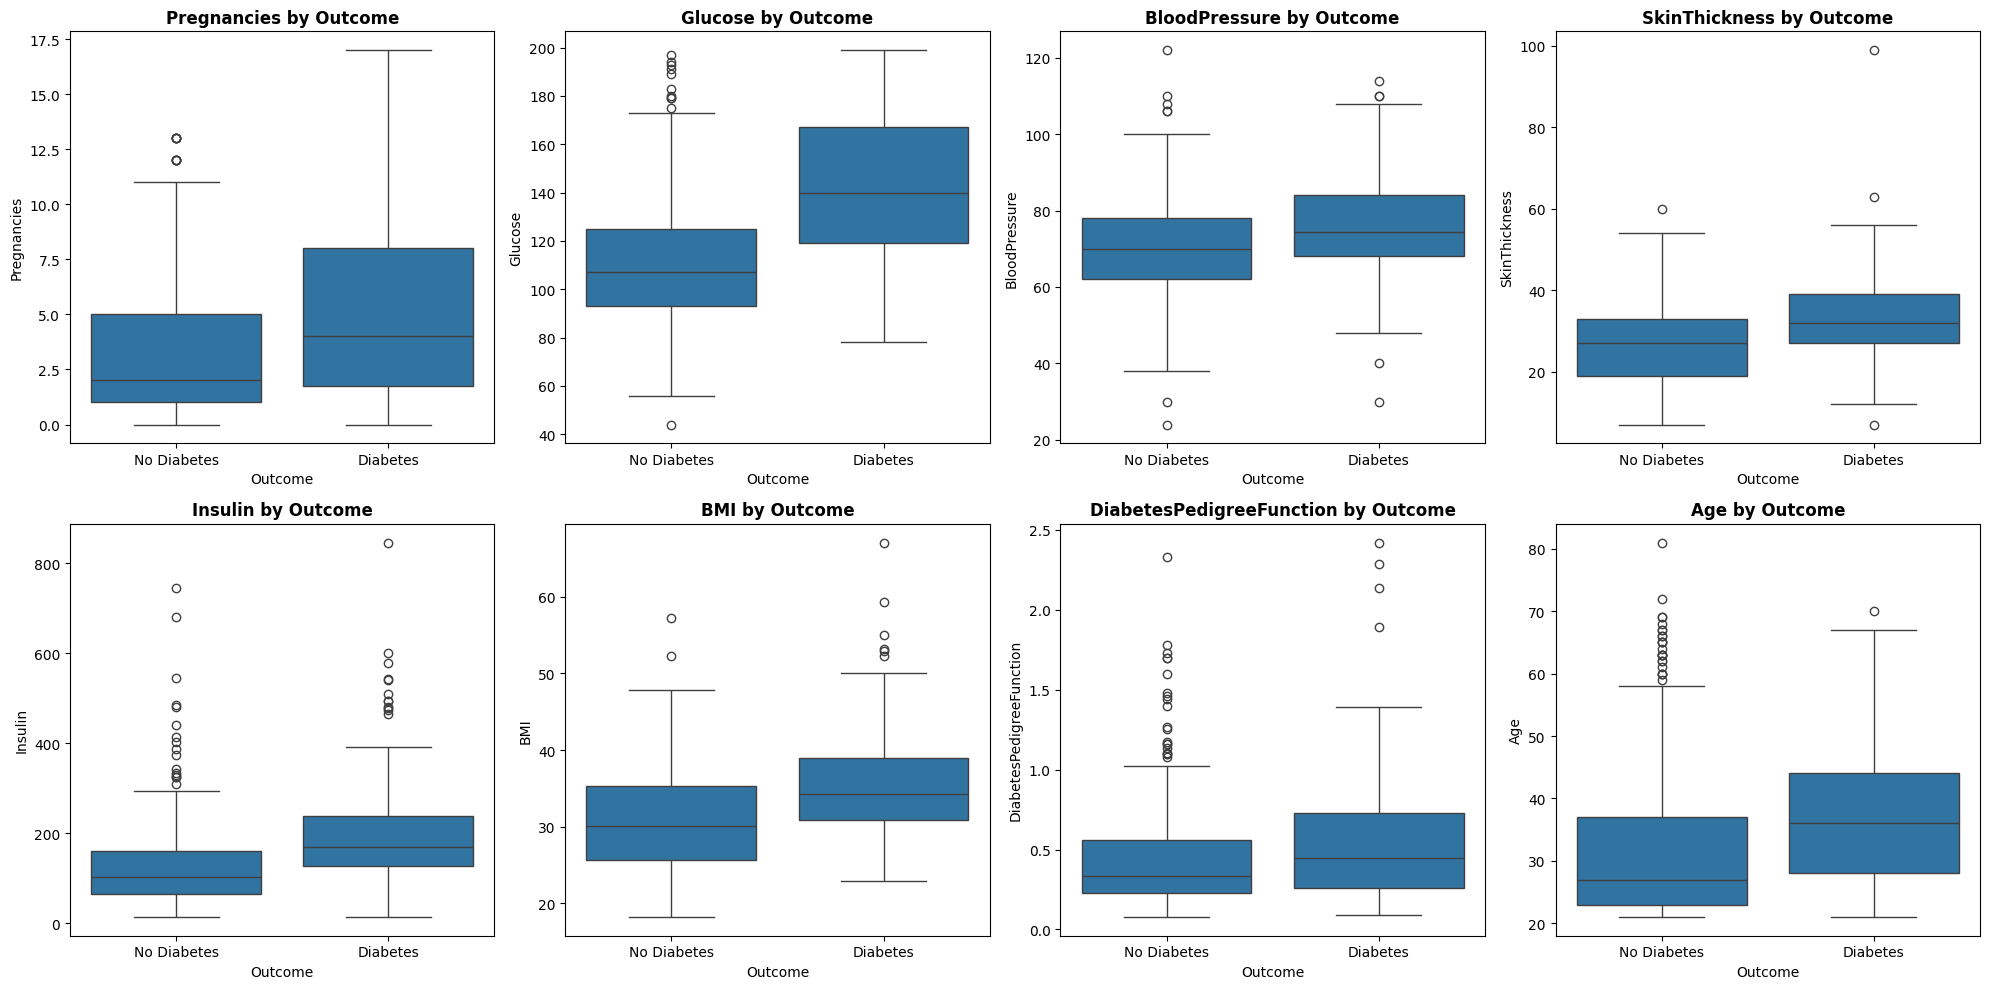

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
ax = axes.flatten()

for i, column in enumerate(df.columns[:-1]):  # Exclude 'Outcome' column
    sns.boxplot(x='Outcome', y=column, data=df, ax=ax[i])
    ax[i].set_title(f'{column} by Outcome', fontweight='bold', fontsize=12)
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No Diabetes', 'Diabetes'])
    plt.tight_layout()
plt.show()

In [11]:
#In Insulin a lot of outliers actually insulin is important for diabetes also no 
# diabates and higher than 300 insulin is suspicious
# this create a cause because we can say that high insulin people
# you are not diabetic but you have high insulin which is suspicious
# and in health false negatives are more dangerous than false positives
#So we will delete those rows 
len(df[(df['Insulin'] > 300) & (df['Outcome'] == 0)])
df = df.drop(df[(df['Insulin'] > 300) & (df['Outcome'] == 0)].index)

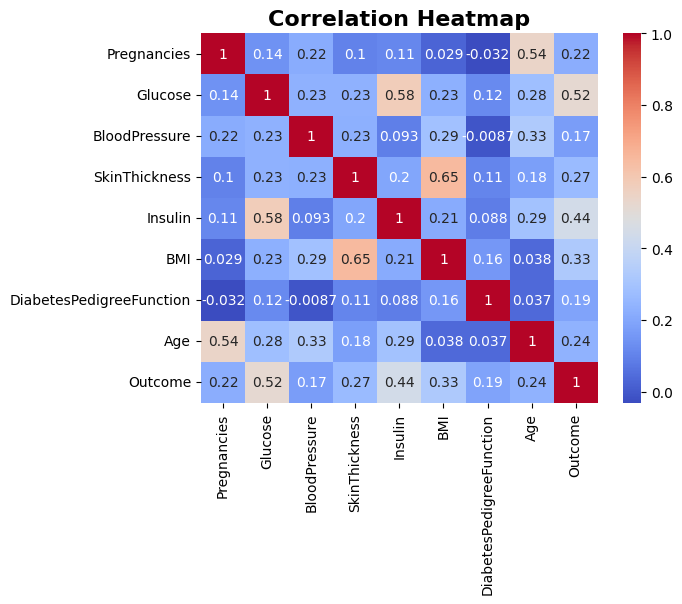

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

In [13]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# we did stratify to keep the same proportion of classes in train and test sets because of class imbalance

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)


In [16]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ege/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [20]:
print(np.isnan(X_test_imputed).sum())

0


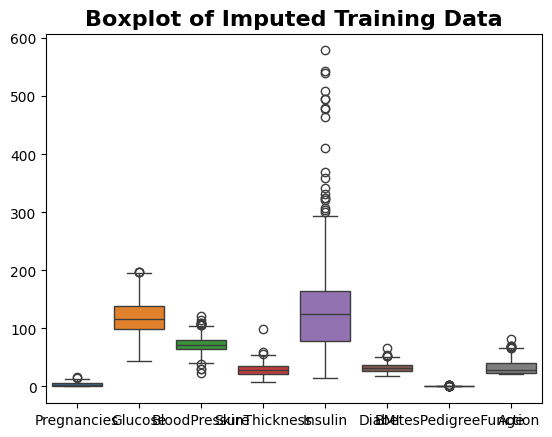

In [23]:
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
sns.boxplot(data=X_train_imputed_df)
plt.title('Boxplot of Imputed Training Data', fontsize=16, fontweight='bold')
plt.show()

In [24]:
def correlation_for_dropping(data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr # use these func when you want to drop highly correlated columns from your dataset to reduce multicollinearity and redundancy

In [25]:
correlation_for_dropping(X_train_imputed_df, 0.80) # No highly correlated features to drop


set()

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [28]:
classifier = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[103  18]
 [ 25  42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       121
           1       0.70      0.63      0.66        67

    accuracy                           0.77       188
   macro avg       0.75      0.74      0.74       188
weighted avg       0.77      0.77      0.77       188


Accuracy Score: 0.7712765957446809


In [31]:
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, n_neighbors=1, weights=distance; total time

In [32]:
y_pred_grid = grid_search.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_grid))

Confusion Matrix:
 [[105  16]
 [ 33  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81       121
           1       0.68      0.51      0.58        67

    accuracy                           0.74       188
   macro avg       0.72      0.69      0.70       188
weighted avg       0.73      0.74      0.73       188


Accuracy Score: 0.7393617021276596
